In [3]:
!pip install gradio

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [5]:
path="C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)"
os.listdir(path)

['New Plant Diseases Dataset(Augmented)', 'train', 'valid']

In [6]:
train_path = os.path.join(path, "train")
print(os.listdir(train_path))
print("*"*100)
test_path = os.path.join(path, "valid")
print(os.listdir(test_path))

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']
****************************************************************************************************
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [7]:
from glob import glob
folders = glob("C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train/*")
folders

['C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Bacterial_spot',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Early_blight',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___healthy',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Late_blight',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Leaf_Mold',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Septoria_leaf_spot',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Spider_mites Two-spotted_spider_mite',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Target_Spot',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Tomato_mosaic_virus',
 'C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train\\Tomato___Tomato_Yellow_Leaf_Curl_Virus']

Text(0.5, 1.0, 'Bacterial Spot')

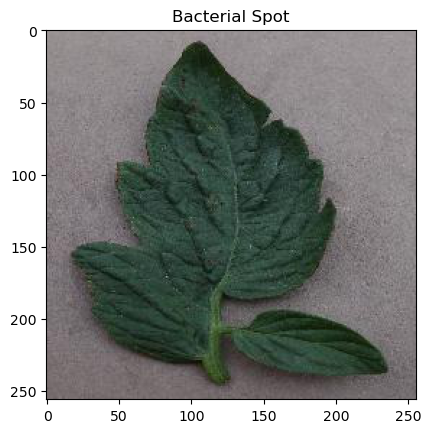

In [8]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG"))
plt.title("Bacterial Spot")

Text(0.5, 1.0, 'Early Blight')

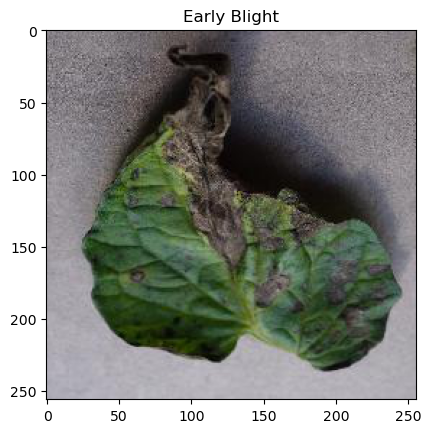

In [9]:
plt.imshow(plt.imread("C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG"))
plt.title("Early Blight")

Text(0.5, 1.0, 'Late Blight')

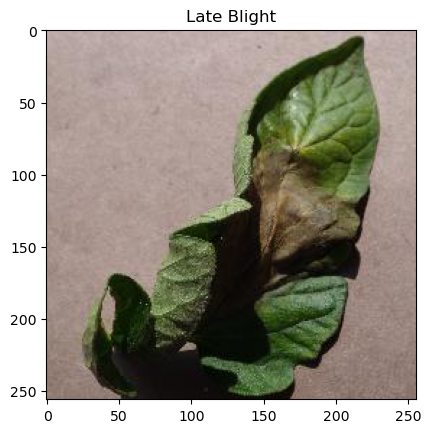

In [10]:
plt.imshow(plt.imread("C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight/0003faa8-4b27-4c65-bf42-6d9e352ca1a5___RS_Late.B 4946.JPG"))
plt.title("Late Blight")

In [11]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [12]:
SIZE = [128, 128]

In [13]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19

In [14]:
vg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

In [15]:
for layer in vg19.layers:
    layer.trainable = False

In [16]:
x = Flatten()(vg19.output)

In [17]:
prediction = Dense(len(folders), activation="softmax")(x)

modelvg = Model(inputs=vg19.input, outputs=prediction)

In [18]:
modelvg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [19]:
modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [20]:
train_datagen_vg19 = ImageDataGenerator(rescale=1./255)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [21]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory(train_path,
                                                 target_size=(128, 128),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=True)

Found 18345 images belonging to 10 classes.


In [22]:
testing_set_vg19 = test_datagen_vg19.flow_from_directory(test_path,
                                                 target_size=(128, 128),
                                                 batch_size=16,
                                                 class_mode="categorical", shuffle=False)

Found 4585 images belonging to 10 classes.


In [23]:
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

r_vg19 = modelvg.fit_generator(trainning_set_vg19,
                       validation_data=testing_set_vg19,
                       epochs=1,
                       callbacks=[callback]
                       )

C:\Users\User\AppData\Local\Temp\ipykernel_8500\4010780196.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r_vg19 = modelvg.fit_generator(trainning_set_vg19,


1147/1147 [==============================] - 3966s 3s/step - loss: 0.7664 - accuracy: 0.7383 - val_loss: 0.7972 - val_accuracy: 0.7289


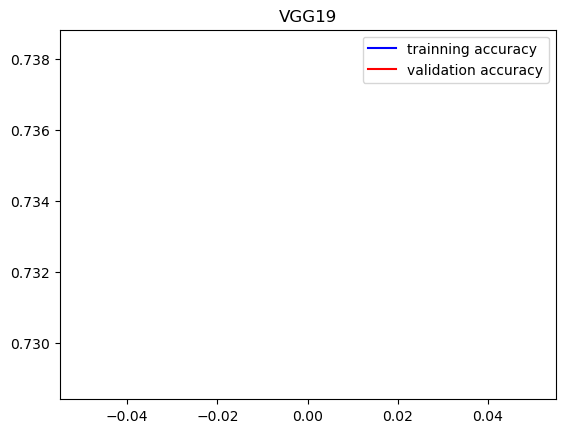

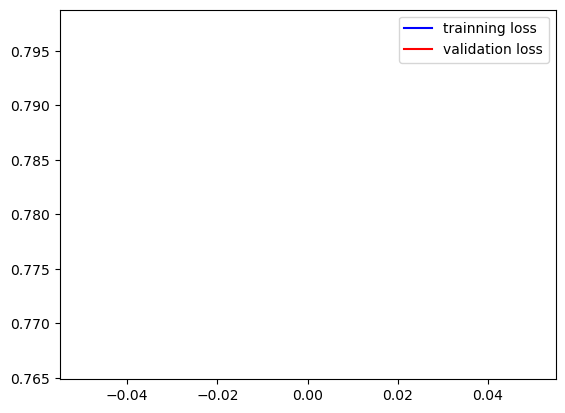

In [24]:
import matplotlib.pyplot as plt
accuracy = r_vg19.history['accuracy']
val_accuracy = r_vg19.history['val_accuracy']
loss = r_vg19.history['loss']
val_loss = r_vg19.history['val_loss']
epochs = range(len(accuracy))
plt.title("VGG19")
plt.plot(epochs, accuracy, color="blue", label="trainning accuracy")
plt.plot(epochs, val_accuracy, color="red", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [25]:
y_pred = modelvg.predict(testing_set_vg19)

287/287 [==============================] - 608s 2s/step


In [26]:
y_pred

array([[7.2184443e-01, 2.1084930e-01, 4.6879813e-04, ..., 5.4960608e-02,
        1.2139045e-06, 9.4241250e-06],
       [9.3506604e-01, 6.3760400e-02, 5.2060142e-05, ..., 3.0718969e-05,
        9.4758931e-08, 6.5488848e-06],
       [9.2778027e-01, 6.6178031e-02, 5.2565534e-04, ..., 8.4459234e-04,
        3.5822488e-06, 4.0163807e-04],
       ...,
       [5.0665782e-04, 1.1242362e-03, 7.2611653e-04, ..., 9.1909774e-04,
        6.1911880e-05, 9.9155372e-01],
       [1.4906375e-03, 1.5599364e-04, 1.3936165e-05, ..., 8.4694457e-06,
        5.4292973e-06, 9.9790335e-01],
       [1.7544084e-04, 4.9432643e-02, 3.1587406e-05, ..., 4.9249393e-05,
        7.5353298e-04, 9.1461629e-01]], dtype=float32)

In [27]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

In [28]:
test_img = plt.imread("C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")

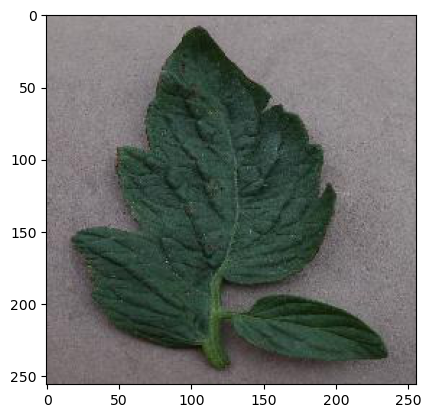

In [29]:
plt.imshow(test_img)

In [30]:
modelvg.save("vgg_19tl.model")

INFO:tensorflow:Assets written to: vgg_19tl.model\assets


INFO:tensorflow:Assets written to: vgg_19tl.model\assets


In [31]:
import cv2
import tensorflow as tf
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (128, 128))
    return new_array.reshape(-1, 128, 128, 3)

model = tf.keras.models.load_model("vgg_19tl.model")

In [32]:
class_dict = trainning_set_vg19.class_indices
class_dict

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [33]:
def prediction_cls(prediction):
    for key, clss in class_dict.items():
        if np.argmax(prediction) == clss:
            return key

In [34]:
prediction = model.predict([prepare("C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/valid/Tomato___healthy/0a334ae6-bea3-4453-b200-85e082794d56___GH_HL Leaf 310.1_flipTB.JPG")])
prediction_cls(prediction)

1/1 [==============================] - 1s 515ms/step


'Tomato___healthy'

In [2]:
prediction = model.predict([prepare("C:/Users/User/Documents/New Plant Diseases Dataset(Augmented)/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus/101849ce-d61a-4c2f-a6a7-8da0d71f237e___YLCV_NREC 2725.JPG")])

prediction_cls(prediction)
#print(prediction)

NameError: name 'model' is not defined

In [38]:
import gradio as gr
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: prediction_cls(prediction)}

In [ ]:
image = gr.inputs.Image(shape=(128,128))
label = gr.outputs.Label(num_top_classes=10)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

C:\Users\User\anaconda3\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\User\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\gradio\routes.py", line 374, in run_predict
    output = await app.get_blocks().process_api(
  File "C:\Users\User\anaconda3\lib\site-packages\gradio\blocks.py", line 1017, in process_api
    result = await self.call_function(
  File "C:\Users\User\anaconda3\lib\site-packages\gradio\blocks.py", line 835, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "C:\Users\User\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\User\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "C:\Users\User\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 754, in run
    result = context.run(func, *args)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_8500\3889958184.py", line 